In [240]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/traffic-accidents/traffic_accidents.csv


In [241]:
data = pd.read_csv('/kaggle/input/traffic-accidents/traffic_accidents.csv')
data.head(3)

,crash_date,traffic_control_device,weather_condition,lighting_condition,first_crash_type,trafficway_type,alignment,roadway_surface_cond,road_defect,crash_type,...,most_severe_injury,injuries_total,injuries_fatal,injuries_incapacitating,injuries_non_incapacitating,injuries_reported_not_evident,injuries_no_indication,crash_hour,crash_day_of_week,crash_month
0,07/29/2023 01:00:00 PM,TRAFFIC SIGNAL,CLEAR,DAYLIGHT,TURNING,NOT DIVIDED,STRAIGHT AND LEVEL,UNKNOWN,UNKNOWN,NO INJURY / DRIVE AWAY,...,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,3.0,13,7,7
1,08/13/2023 12:11:00 AM,TRAFFIC SIGNAL,CLEAR,"DARKNESS, LIGHTED ROAD",TURNING,FOUR WAY,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,...,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,2.0,0,1,8
2,12/09/2021 10:30:00 AM,TRAFFIC SIGNAL,CLEAR,DAYLIGHT,REAR END,T-INTERSECTION,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,...,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,3.0,10,5,12


In [242]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209306 entries, 0 to 209305
Data columns (total 24 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   crash_date                     209306 non-null  object 
 1   traffic_control_device         209306 non-null  object 
 2   weather_condition              209306 non-null  object 
 3   lighting_condition             209306 non-null  object 
 4   first_crash_type               209306 non-null  object 
 5   trafficway_type                209306 non-null  object 
 6   alignment                      209306 non-null  object 
 7   roadway_surface_cond           209306 non-null  object 
 8   road_defect                    209306 non-null  object 
 9   crash_type                     209306 non-null  object 
 10  intersection_related_i         209306 non-null  object 
 11  damage                         209306 non-null  object 
 12  prim_contributory_cause       

In [243]:
data.describe()

,num_units,injuries_total,injuries_fatal,injuries_incapacitating,injuries_non_incapacitating,injuries_reported_not_evident,injuries_no_indication,crash_hour,crash_day_of_week,crash_month
count,209306.000000,209306.000000,209306.000000,209306.000000,209306.000000,209306.000000,209306.000000,209306.000000,209306.000000,209306.000000
mean,2.063300,0.382717,0.001859,0.038102,0.221241,0.121516,2.244002,13.373047,4.144024,6.771822
std,0.396012,0.799720,0.047502,0.233964,0.614960,0.450865,1.241175,5.603830,1.966864,3.427593
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,9.000000,2.000000,4.000000
50%,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,14.000000,4.000000,7.000000
75%,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,3.000000,17.000000,6.000000,10.000000
max,11.000000,21.000000,3.000000,7.000000,21.000000,15.000000,49.000000,23.000000,7.000000,12.000000


In [244]:
data.shape

(209306, 24)

In [245]:
data.columns

Index(['crash_date', 'traffic_control_device', 'weather_condition',
       'lighting_condition', 'first_crash_type', 'trafficway_type',
       'alignment', 'roadway_surface_cond', 'road_defect', 'crash_type',
       'intersection_related_i', 'damage', 'prim_contributory_cause',
       'num_units', 'most_severe_injury', 'injuries_total', 'injuries_fatal',
       'injuries_incapacitating', 'injuries_non_incapacitating',
       'injuries_reported_not_evident', 'injuries_no_indication', 'crash_hour',
       'crash_day_of_week', 'crash_month'],
      dtype='object')

Análise Univariada

Distribuição de variáveis-chave como injuries_total, crash_hour, weather_condition.
Histograma e boxplot para detectar outliers.



In [246]:
# Converter a coluna "crash_date" para datetime
data["crash_date"] = pd.to_datetime(data["crash_date"], format="%m/%d/%Y %I:%M:%S %p")

# Criar uma nova coluna com apenas a data (YYYY-MM-DD)
data["crash_date_only"] = data["crash_date"].dt.date

# Converter a coluna para tipo inteiro (caso esteja como string)
data["crash_day_of_week"] = data["crash_day_of_week"].astype(int, errors="ignore")

# Criar o dicionário de mapeamento
days_mapping = {
    1: "Sunday",
    2: "Monday",
    3: "Tuesday",
    4: "Wednesday",
    5: "Thursday",
    6: "Friday",
    7: "Saturday"
}

# Substituir os valores
data["crash_day_of_week"] = data["crash_day_of_week"].map(days_mapping)

# Converter a coluna para tipo inteiro (caso esteja como string)
data["crash_month"] = data["crash_month"].astype(int, errors="ignore")

# Criar o dicionário de mapeamento
month_mapping = {
    1: "January",
    2: "February",
    3: "March",
    4: "April",
    5: "May",
    6: "June",
    7: "July",
    8: "August",
    9: "September",
    10: "October",
    11: "November",
    12: "December"
}

# Substituir os valores
data["crash_month"] = data["crash_month"].map(month_mapping)

In [247]:
# Contar a quantidade de acidentes por ano
data["crash_year"] = pd.to_datetime(data["crash_date_only"]).dt.year
accidents_per_year = data["crash_year"].value_counts().sort_index()

# Exibir o resultado
print(accidents_per_year)

crash_year
2013        2
2015     1917
2016     7615
2017    17655
2018    27438
2019    27959
2020    22784
2021    25689
2022    25543
2023    25454
2024    26214
2025     1036
Name: count, dtype: int64


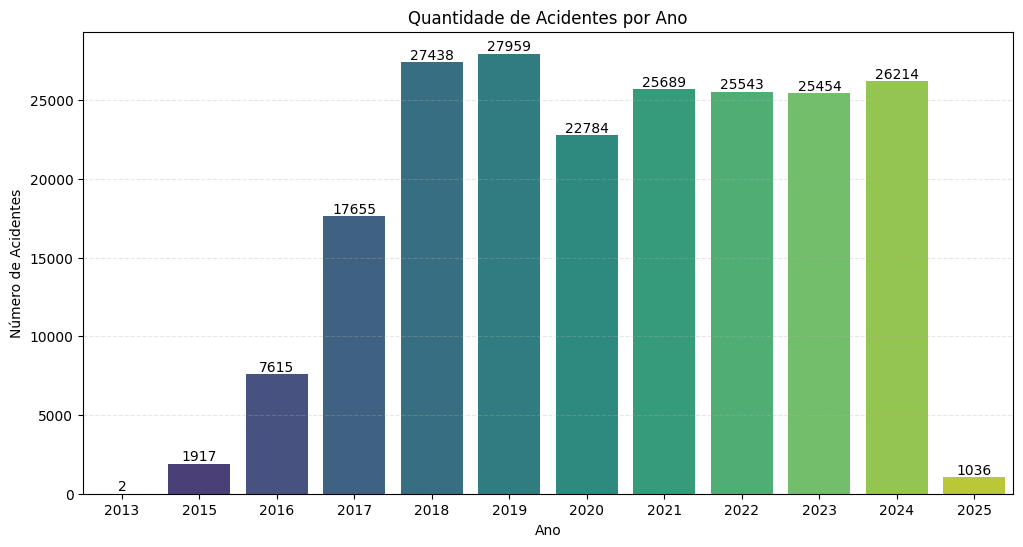

In [248]:
plt.figure(figsize=(12, 6))

# Criar o gráfico de barras
ax = sns.barplot(x=accidents_per_year.index, y=accidents_per_year.values, palette="viridis")

# Personalizando o gráfico
plt.xlabel("Ano")
plt.ylabel("Número de Acidentes")
plt.title("Quantidade de Acidentes por Ano")
plt.grid(axis="y", linestyle="--", alpha=0.3)

# Adicionando os valores acima de cada barra
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                fontsize=10, color='black', 
                xytext=(0, 5), textcoords='offset points')

# Exibir o gráfico
plt.show()


In [249]:
# Contar a quantidade de acidentes por mês
accidents_per_month = data["crash_month"].value_counts().sort_index()

# Exibir o resultado
accidents_per_month

crash_month
April        15096
August       18350
December     18816
February     14621
January      16606
July         17834
June         17851
March        15265
May          17432
November     18328
October      20089
September    19018
Name: count, dtype: int64

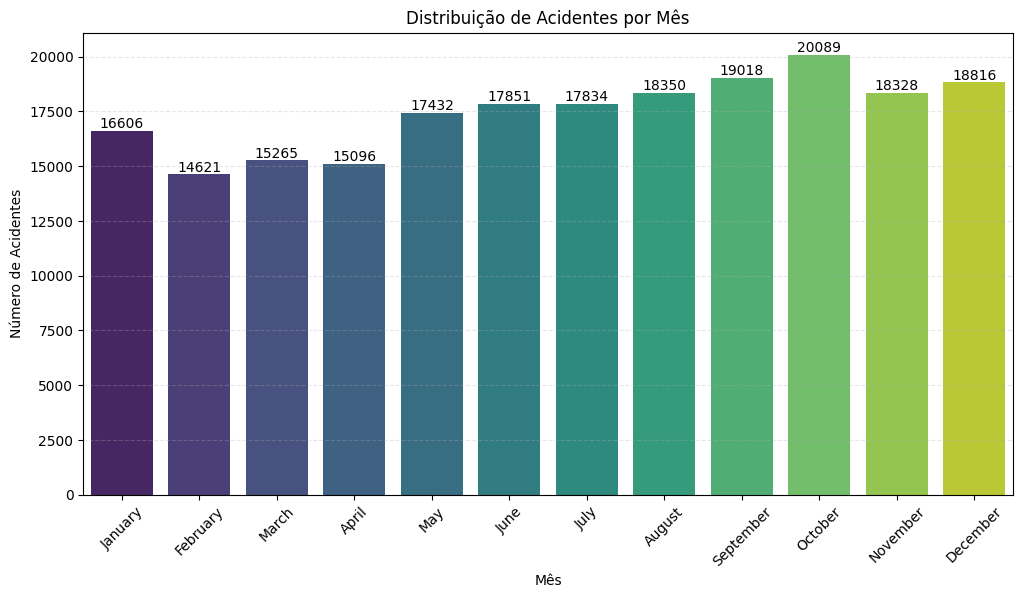

In [250]:
plt.figure(figsize=(12, 6))

# Criar gráfico de barra com os meses na ordem correta
order_months = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]

ax = sns.countplot(x=data["crash_month"], order=order_months, palette="viridis")

# Personalizando o gráfico
plt.xlabel("Mês")
plt.ylabel("Número de Acidentes")
plt.title("Distribuição de Acidentes por Mês")
plt.grid(axis="y", linestyle="--", alpha=0.3)
plt.xticks(rotation=45)  # Gira os anos para melhor visualização

# Adicionando os valores acima de cada barra
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                fontsize=10, color='black', 
                xytext=(0, 5), textcoords='offset points')

# Exibir o gráfico
plt.show()


In [251]:
# Contar a quantidade de acidentes por dia da semana
accidents_per_day = data["crash_day_of_week"].value_counts().sort_index()

# Exibir o resultado
accidents_per_day

crash_day_of_week
Friday       34458
Monday       27938
Saturday     30710
Sunday       25246
Thursday     30787
Tuesday      30074
Wednesday    30093
Name: count, dtype: int64

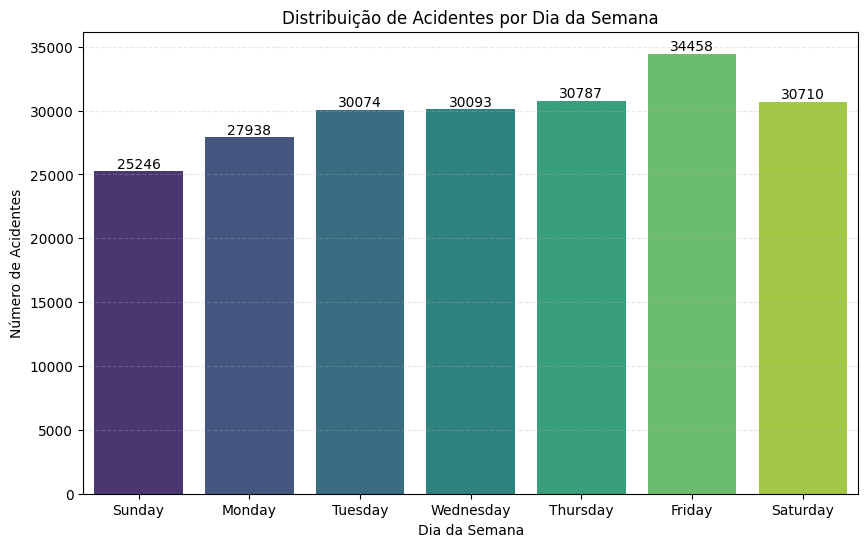

In [252]:
plt.figure(figsize=(10, 6))

# Criar gráfico de barras com os dias da semana na ordem correta
order_days = ["Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"]

ax = sns.countplot(x=data["crash_day_of_week"], order=order_days, palette="viridis")

# Personalizando o gráfico
plt.xlabel("Dia da Semana")
plt.ylabel("Número de Acidentes")
plt.title("Distribuição de Acidentes por Dia da Semana")
plt.grid(axis="y", linestyle="--", alpha=0.3)

# Adicionando os valores acima de cada barra
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                fontsize=10, color='black', 
                xytext=(0, 5), textcoords='offset points')

# Exibir o gráfico
plt.show()


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


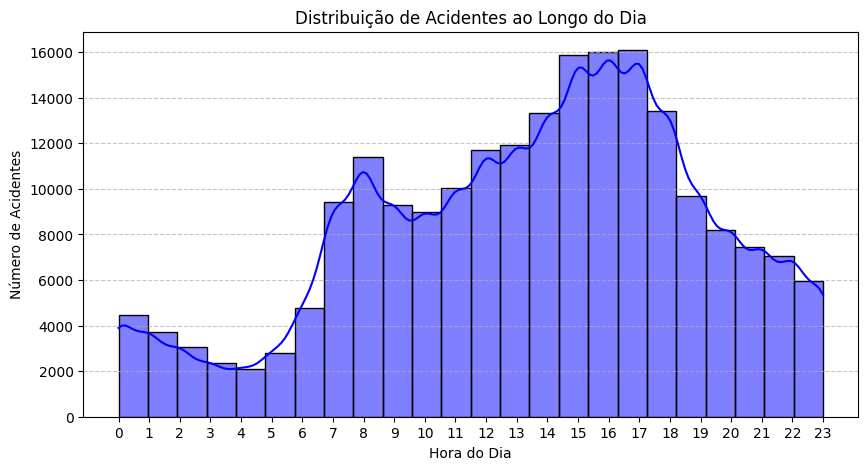

In [253]:
plt.figure(figsize=(10, 5))

# Criando histograma da quantidade de acidentes por hora do dia
sns.histplot(data["crash_hour"], bins=24, kde=True, color="blue")
data = data.replace([np.inf, -np.inf], np.nan).dropna()

# Personalizando o gráfico
plt.xticks(range(0, 24))  # Garantindo que todas as horas apareçam no eixo X
plt.xlabel("Hora do Dia")
plt.ylabel("Número de Acidentes")
plt.title("Distribuição de Acidentes ao Longo do Dia")
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Exibir o gráfico
plt.show()


In [254]:
total_victims = data["injuries_total"].sum()
print(f"Quantidade total de vítimas: {int(total_victims)}")

Quantidade total de vítimas: 80105


In [257]:
# Contar a quantidade de acidentes por dia da semana
accidents_per_weather_condition = data["weather_condition"].value_counts()

# Exibir o resultado
accidents_per_weather_condition

weather_condition
CLEAR                       164700
RAIN                         21703
CLOUDY/OVERCAST               7533
SNOW                          6871
UNKNOWN                       6534
OTHER                          627
FREEZING RAIN/DRIZZLE          510
FOG/SMOKE/HAZE                 360
SLEET/HAIL                     308
BLOWING SNOW                   127
SEVERE CROSS WIND GATE          32
BLOWING SAND, SOIL, DIRT         1
Name: count, dtype: int64

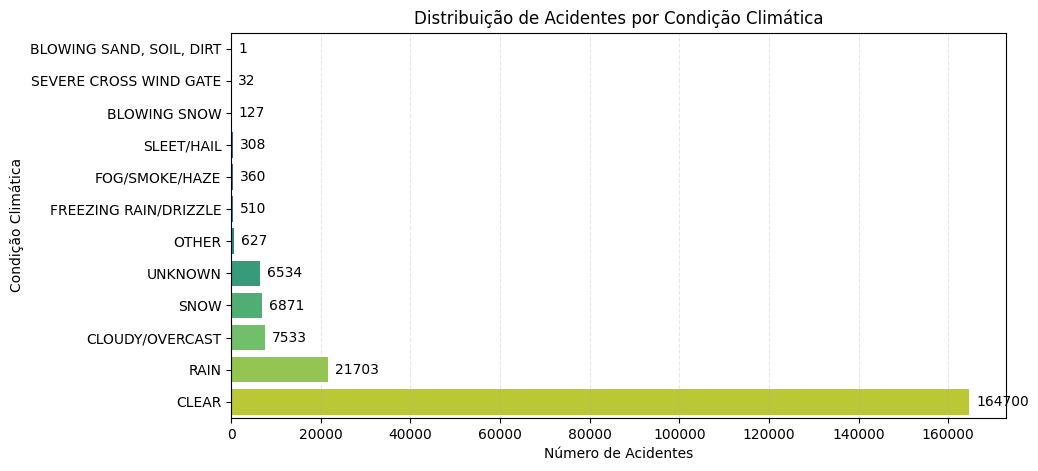

In [279]:
plt.figure(figsize=(10, 5))

# Criando o gráfico de barras para condições climáticas, com a ordem invertida
ax = sns.countplot(y=data["weather_condition"], palette="viridis", order=data["weather_condition"].value_counts().index[::-1])

# Personalizando o gráfico
plt.xlabel("Número de Acidentes")
plt.ylabel("Condição Climática")
plt.title("Distribuição de Acidentes por Condição Climática")
plt.grid(axis="x", linestyle="--", alpha=0.3)

# Adicionando os valores abaixo de cada barra
for p in ax.patches:
    ax.annotate(f'{int(p.get_width())}', 
                (p.get_width(), p.get_y() + p.get_height() / 2.), 
                ha='left', va='center', 
                fontsize=10, color='black', 
                xytext=(5, 0), textcoords='offset points')

# Exibir o gráfico
plt.show()
